# **EXPLORATORY DATA ANALYSIS WITH SQL AND PYTHON OF IMDB MOVIES**

### PREPARE ENVIRNOMENT

In [ ]:
%pip install ipython-sql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### INITIATE IPYTHON_SQL AND CONNECT TO SQLITE DATABASE

In [2]:
%load_ext sql

%sql sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db 

'Connected: @/content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db'

In [ ]:
%%sql 

SELECT * FROM basics LIMIT 5;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
%%sql 

SELECT * FROM akas LIMIT 5;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


titleId,ordering,title,region,language,types,attributes,isOriginalTitle
tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
tt0000001,2,Carmencita,DE,\N,\N,literal title,0
tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [ ]:
%%sql 

SELECT * FROM ratings LIMIT 5;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


tconst,averageRating,numVotes
tt0000001,5.7,1910
tt0000002,5.8,256
tt0000003,6.5,1712
tt0000004,5.6,169
tt0000005,6.2,2527


In [ ]:
%%sql

SELECT * FROM crew LIMIT 5;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


tconst,directors,writers
tt0000001,nm0005690,\N
tt0000002,nm0721526,\N
tt0000003,nm0721526,\N
tt0000004,nm0721526,\N
tt0000005,nm0005690,\N


In [ ]:
%%sql

SELECT * FROM names LIMIT 5;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0050419,tt0031983"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0057345,tt0056404"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0080455,tt0078723"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0060827,tt0050976"


### QUERIES

1. **Which decade from the 20th century has better ratings?** Are pre '60s films (golden age of Hollywood) just better?

  * To obtain that info we need to merge ```basics``` with ```ratings``` into a single table. 
  * Not every movie reviewed in ```ratings``` is present in ```basics``` but an inner join is preferred because we want complete data of the attributes *startYear* and *averageRating*



In [3]:
%%sql

SELECT 
  ROUND(AVG(averageRating),3) AS avg_rating,
  MIN(averageRating) AS min_rating,
  MAX(averageRating) AS max_rating,
  SUBSTR(CAST(startYear as TEXT),3,1) || '0s' AS decade
FROM basics 
  INNER JOIN ratings ON basics.tconst = ratings.tconst
WHERE startYear >= 1900 AND startYear <= 1999 AND startYear != '\N' AND titleType = 'movie' 
GROUP BY decade
ORDER BY decade ASC;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


avg_rating,min_rating,max_rating,decade
4.241,2.5,7.4,00s
5.886,1.0,9.2,10s
6.095,1.0,9.3,20s
6.078,1.1,9.4,30s
6.174,1.0,9.5,40s
6.269,1.2,9.5,50s
6.17,1.0,9.4,60s
5.976,1.1,9.8,70s
5.996,1.0,9.8,80s
6.0,1.0,9.8,90s


Look at that! The interval 1940-1969 has the best scores. And the first decade, when cinema was still at its infancy, has the worst ratings. But SQLite doesn't have many aggregation functions. It would also be interesting to know things like the variance of ratings. We can do that with pandas.

The query we want to transform into a pandas dataframe:

```sql
SELECT 
  primaryTitle AS title, 
  CAST(averageRating AS NUMERIC) AS rating, 
  startYear AS year, 
  SUBSTR(CAST(startYear as TEXT),3,1) || '0s' AS decade  
FROM basics 
  INNER JOIN ratings ON basics.tconst = ratings.tconst 
WHERE startYear >= 1900 AND startYear <= 1999 AND startYear != '\N' AND titleType = 'movie'
```
The main difference is that the results are not aggregated. We'll do those operations with python


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [28]:
res = %sql SELECT primaryTitle AS title, CAST(averageRating AS NUMERIC) AS rating, startYear AS year, SUBSTR(CAST(startYear as TEXT),3,1) || '0s' AS decade  FROM basics INNER JOIN ratings ON basics.tconst = ratings.tconst WHERE startYear >= 1900 AND startYear <= 1999 AND startYear != '\N' AND titleType = 'movie'
df = res.DataFrame()
display(df.sample(5),
        df.info())

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94197 entries, 0 to 94196
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   94197 non-null  object 
 1   rating  94197 non-null  float64
 2   year    94197 non-null  object 
 3   decade  94197 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.9+ MB


,title,rating,year,decade
5065,Tonight or Never,6.6,1931,30s
7495,Naughty Marietta,6.6,1935,30s
5267,A Farewell to Arms,6.4,1932,30s
71213,"Harry Hard, Detective",4.0,1971,70s
10688,Miseria e nobiltà,6.9,1940,40s


None

In [6]:
grouped = df.groupby('decade')['rating'].describe().reset_index()
grouped

,decade,count,mean,std,min,25%,50%,75%,max
0,00s,79.0,4.240506,0.996471,2.5,3.6,4.1,5.0,7.4
1,10s,1604.0,5.885910,1.191894,1.0,5.3,6.0,6.6,9.2
2,20s,3738.0,6.095131,1.162731,1.0,5.6,6.3,6.9,9.3
3,30s,8754.0,6.077862,0.879250,1.1,5.6,6.2,6.7,9.4
4,40s,2774.0,6.174153,1.028466,1.0,5.6,6.3,6.9,9.5
5,50s,4316.0,6.268837,1.100633,1.2,5.6,6.4,7.0,9.5
6,60s,7915.0,6.169779,1.186996,1.0,5.4,6.3,7.0,10.0
7,70s,15827.0,5.975889,1.236269,1.1,5.2,6.1,6.8,10.0
8,80s,23651.0,5.996410,1.240567,1.0,5.2,6.1,6.9,9.8
9,90s,25539.0,6.000329,1.295696,1.0,5.2,6.1,6.9,10.0


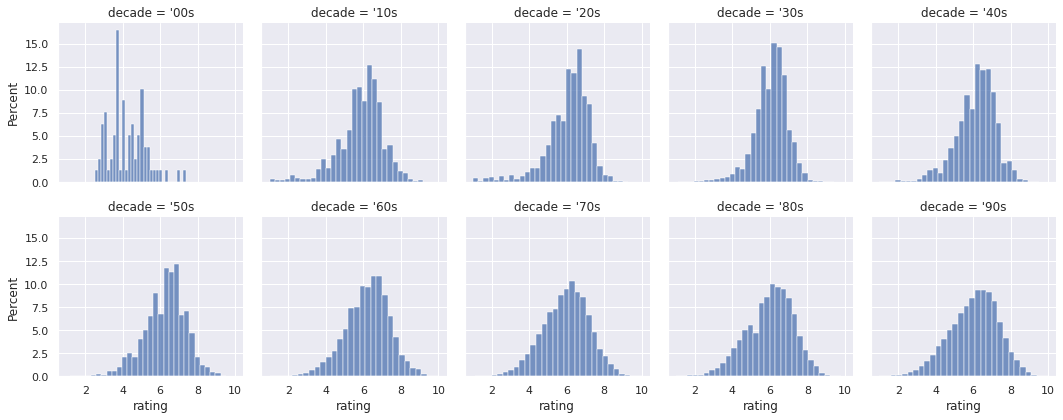

In [7]:
# df.iloc[df.groupby('decade')['rating'].idxmax()]
g = sns.FacetGrid(df[['rating','decade']],col='decade',col_wrap=5,col_order=sorted(df.decade.unique()))
g.map(sns.histplot,'rating',stat='percent',bins=30)
g.set_titles(col_template="decade = '{col_name}")

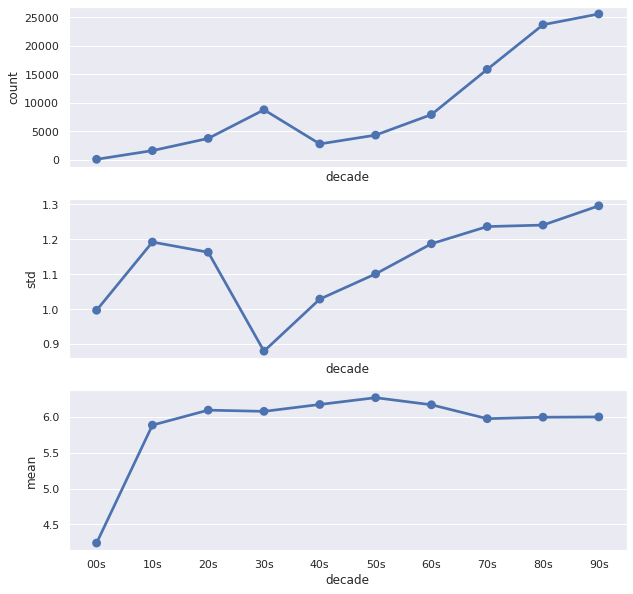

In [8]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,10),sharex=True)
sns.pointplot(ax=ax[0],data=grouped,x='decade',y='count')
sns.pointplot(ax=ax[1],data=grouped,x='decade',y='std')
sns.pointplot(ax=ax[2],data=grouped,x='decade',y='mean')


The histograms reveal that the distribution of scores is bell-shaped and maybe (approximately) normal. The majority of titles are just OK (score of around 6) and very good/bad movies are rare. This pattern is more obvious in the second half of the century. There are more clear deviations from normality in previous decades. For instance, the distribution for the '20s is a bit skewed, with a greater proportion of films with bad ratings (below 5). We can appreciate this on the long left "tail" of the histogram.

Other interesting conclusions can be derived from the line plots. There is an obvious trend in terms of number of films released. The industry of cinema has become bigger and bigger with the years and more movies are released every decade.
On the other hand, the "quality" of movies (at least in terms of scores) hasn't increased since the '20s or '30s. At the same time there has been an increase in variability of ratings over the decades. There are more bad films and more good films. Just compare the width of the distribution of '30s ratings with the width of the distribution for the '90s

3. **Exploratory analysis of Kubrick films** (one of my favorite directors)
 * This is an open-ended research question, we just want to gather the complete filmography in a single table and then propose specific questions
 * We need all the tables: ```crew``` to get the director's id and the id of movies associated he directed. From ```names``` we can get the name of the director which we'll use to filter the results and retrieve only movies from Kubrick.  With the title ids we can get the scores from ```ratings```, the names of the movies from ```akas``` and the release year from ```basics```.
 * Eventhough ```basics``` contains a lot of movies, I've noticed there are a lot missing. In our case, almost all of Kubrick films are missing. Fortunately, the table ```akas```does contain them all. 

In [9]:
%%sql

SELECT title, titleType, startYear AS year, averageRating as rating, numVotes
FROM crew
  INNER JOIN names ON crew.directors = names.nconst
  INNER JOIN ratings ON crew.tconst = ratings.tconst
  INNER JOIN akas ON ratings.tconst = akas.titleId
  LEFT JOIN basics ON akas.titleId = basics.tconst -- left join to avoid losing data
WHERE primaryName = 'Stanley Kubrick' AND isOriginalTitle = 1 
ORDER BY year ASC;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


title,titleType,year,rating,numVotes
Day of the Fight,None,None,6.2,4616
Flying Padre,None,None,5.5,4289
The Seafarers,None,None,5.1,2869
Fear and Desire,None,None,5.4,11966
Killer's Kiss,None,None,6.6,24088
The Killing,None,None,8.0,89725
Paths of Glory,None,None,8.4,196163
Spartacus,None,None,7.9,134729
Lolita,None,None,7.5,101367
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,None,None,8.4,486874


Only three movies have date of release, which means that all other films were in the ```akas``` table (and ```ratings```) but not in ```basics```. It becomes clear now why we had to use a left join.

However, interestingly the movies are still in correct order. Knowing that we can appreciate there is a progression or improvement in terms of ratings. We can see if that insight is correct with a plot

In [10]:
res = %sql SELECT title,startYear AS year, CAST(averageRating AS NUMERIC) as rating, CAST(numVotes AS INTEGER) AS votes FROM crew INNER JOIN names ON crew.directors = names.nconst INNER JOIN ratings ON crew.tconst = ratings.tconst INNER JOIN akas ON ratings.tconst = akas.titleId LEFT JOIN basics ON akas.titleId = basics.tconst WHERE primaryName = 'Stanley Kubrick' AND isOriginalTitle = 1 ORDER BY year ASC;
kub = res.DataFrame()
kub.info()

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   15 non-null     object 
 1   year    3 non-null      object 
 2   rating  15 non-null     float64
 3   votes   15 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 608.0+ bytes


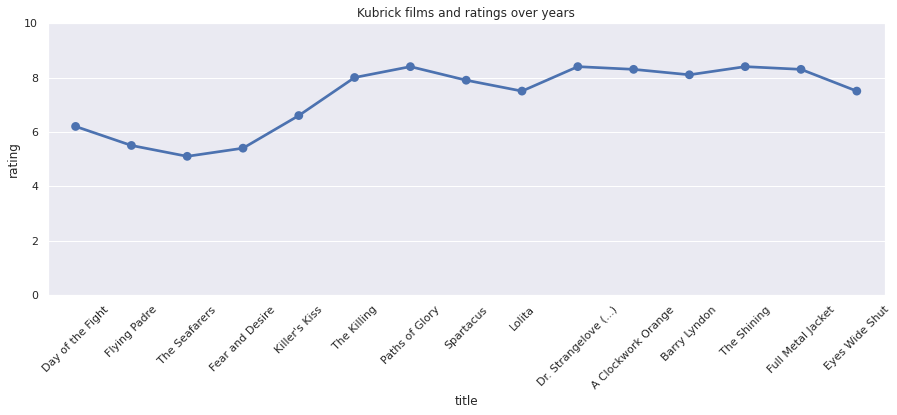

In [25]:
sns.set(rc={"figure.figsize":(15,5)})
g = sns.pointplot(data=kub,x='title',y='rating')
plt.xticks(rotation=45);
names_short = kub['title'].replace('.+Strangelove.+','Dr. Strangelove (...)',regex=True) # to fit all the titles in x-axis
g.set_xticklabels(names_short); 
g.set_ylim([0,10]);
g.set_title('Kubrick films and ratings over years')
# plt.savefig('/content/drive/MyDrive/Colab_Notebooks/sql_imdb/kubrick_ratings.jpg',dpi=300,bbox_inches='tight')

The first 3 works are not really movies, but short documentaries, and the first two movies (Fear and Desire and Killer's Kiss) are still a bit amateur. After that he started giving us masterpiece after masterpiece.

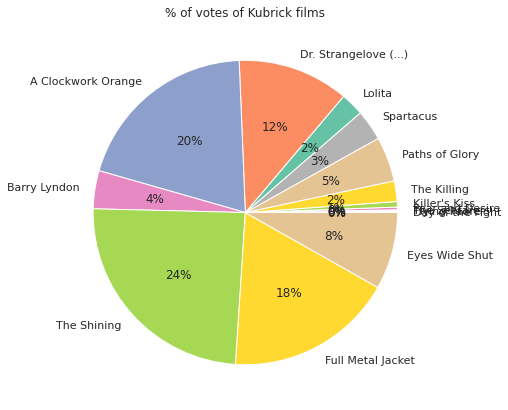

In [27]:
plt.figure(figsize=(15,7))
plt.pie(kub['votes'],
        labels=names_short,
        colors=sns.color_palette('Set2'),
        autopct='%0.0f%%');
plt.title('% of votes of Kubrick films');
# plt.savefig('/content/drive/MyDrive/Colab_Notebooks/sql_imdb/kubrick_votes.jpg',dpi=300,bbox_inches='tight')

In terms of votes, The Shining is definitely the most popular film of the artist, followed by A Clockwork Orange and Full Metal Jacket

Is there a match between popularity and rating? We all know a movie doesn't have to be good to be known and liked by many...

In [12]:
top = pd.DataFrame({'byrating':kub.sort_values('rating',ascending=False)['title'].values,
                    'byvotes':kub.sort_values('votes',ascending=False)['title'].values})
top

,byrating,byvotes
0,Paths of Glory,The Shining
1,Dr. Strangelove or: How I Learned to Stop Worr...,A Clockwork Orange
2,The Shining,Full Metal Jacket
3,A Clockwork Orange,Dr. Strangelove or: How I Learned to Stop Worr...
4,Full Metal Jacket,Eyes Wide Shut
5,Barry Lyndon,Paths of Glory
6,The Killing,Barry Lyndon
7,Spartacus,Spartacus
8,Lolita,Lolita
9,Eyes Wide Shut,The Killing


In [13]:
from statistics import mean
# how far are movies in the two lists?
jumps = []
for rat in top['byrating']:
  for i,row in top.iterrows():
    if rat == row['byvotes']:
      jumps.append(i)
position_rating = top.index
dists = [abs(pos_rat - jump) for pos_rat,jump in zip(position_rating,jumps)]
mean(dists)

1.7333333333333334

There is a good correspondence between the two lists. On average there is a "mismatch of 1.7 places". We can pick a movie from the list of top rated films and if it's in third place we can guess it will be in the top five of most voted films, not further than the fifth position

3. **Who are the most popular film directors of the 20th and 21st century?**

In [14]:
%%sql

SELECT 
  primaryName AS director, 
  ROUND(AVG(numVotes),2) as avg_votes, 
  ROUND(averageRating,2) as avg_rating
FROM crew
  INNER JOIN names ON crew.directors = names.nconst
  INNER JOIN ratings ON crew.tconst = ratings.tconst
  INNER JOIN akas ON ratings.tconst = akas.titleId
  LEFT JOIN basics ON akas.titleId = basics.tconst 
WHERE startYear >= 1900 AND isOriginalTitle = 1 AND titleType = 'movie'
GROUP BY director
ORDER BY avg_votes DESC
LIMIT 10;


 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


director,avg_votes,avg_rating
Christopher Nolan,1324375.9,7.3
Frank Darabont,1324025.67,6.9
John Lasseter,981617.0,8.3
Quentin Tarantino,973626.22,7.8
David Fincher,840897.25,7.8
Lee Unkrich,827479.0,8.3
George Lucas,761275.67,7.6
Stanley Kubrick,692133.33,7.5
Andrew Stanton,687014.0,8.4
James Cameron,683254.5,7.8


This is very interesting. I expected to find blockbuster directors like Nolan, Tarantino or Lucas but I didn't expect Darabont to be in the list. To be honest, I didn't know who he was. He has directed excellent films like The Shawshank Redemption and The Green Mile. And the first one is indeed the most voted film in imdb

In [15]:
%%sql

SELECT primaryTitle,CAST(numVotes AS INTEGER) AS votes
FROM basics
  INNER JOIN ratings ON basics.tconst == ratings.tconst
WHERE titleType == 'movie' 
ORDER BY votes DESC
LIMIT 10;

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/sql_imdb/imdb.db
Done.


primaryTitle,votes
The Shawshank Redemption,2636714
The Dark Knight,2607988
Inception,2312086
Fight Club,2080309
Forrest Gump,2041044
Pulp Fiction,2017916
The Matrix,1886948
The Lord of the Rings: The Fellowship of the Ring,1834020
The Lord of the Rings: The Return of the King,1811141
Interstellar,1778987
